In [40]:
import pandas as pd
import numpy as np

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style','drive-wheels','engine-location','wheel-base','length', 'width', 'height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system', 'bore','stroke', 'compression-ratio', 'horsepower','peak-rpm','city-mpg','highway-mpg','price']

# read in the dataset, assigning column names as per the documentation
cars = pd.read_csv('data/imports-85.data', names=cols)


In [41]:
# select just the numeric columns
numeric_cols = ['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
numeric_cars = cars[numeric_cols]

# replace the '?' missing values with nan
numeric_cars = numeric_cars.replace('?',np.nan)

In [42]:
# convert object column types to floats
numeric_cars = numeric_cars.astype('float')

In [43]:
# work out how many of each colum contain null values
numeric_cars.isnull().sum()

symboling             0
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [45]:
# as its the target column, records with a null price will not be useful for training and predicting, so remove the row
numeric_cars = numeric_cars.dropna(subset=['price'])

#Replace missing values in other columns using column means.
means = numeric_cars.mean()
numeric_cars = numeric_cars.fillna(means)

# check there are no more missing values 
numeric_cars.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [54]:
# normalise (or standardise) all of the numeric columns
normalised_cars = (numeric_cars - numeric_cars.mean()) / (numeric_cars.std())


201

In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [107]:
# select just the numeric columns we are interested in as features
numeric_cols = ['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']

def knn_train_test(train_col,target_col,df):
    
    k_values=[1, 3, 5, 7, 9]
    rmse_vals = dict()
    
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    # get about 50% of the data to use for training the model, split the input dataframe
    half_row = int(shuffled_df.shape[0] * 0.5)
   
    train_df = shuffled_df.iloc[0:half_row]
    test_df = shuffled_df.iloc[half_row:]
    
    for k in k_values:
        
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(train_df[[train_col]],train_df[target_col])
        predictions = model.predict(test_df[[train_col]])
    
        rmse = np.sqrt(mean_squared_error(test_df[target_col],predictions))
        rmse_vals[k] = rmse
    
    return rmse_vals


rmse_results = dict()

# call knn_train_test for each numeric column in the data
for col in numeric_cols:
        
    rmse_results[col] = knn_train_test(col,'price',numeric_cars)

rmse_results

{'bore': {1: 8602.5884845006603,
  3: 6984.2394894809158,
  5: 6795.3883115355857,
  7: 6896.5594996277259,
  9: 6882.8228150900222},
 'city-mpg': {1: 5901.1435743547636,
  3: 4608.1804463803974,
  5: 4760.4498418773101,
  7: 5218.8478256216049,
  9: 5446.82446248222},
 'compression-ratio': {1: 8087.205346523092,
  3: 7375.0636855783587,
  5: 6610.8121531591287,
  7: 6732.8012829415147,
  9: 7024.4855254634349},
 'curb-weight': {1: 5264.2902307588784,
  3: 5022.3180117572329,
  5: 4445.1419203752348,
  7: 4330.6081044180528,
  9: 4632.9252512130197},
 'engine-size': {1: 3258.4861059962027,
  3: 2951.5259704863593,
  5: 3271.4499383316111,
  7: 3563.0867742564151,
  9: 3831.8244149840766},
 'height': {1: 8751.1600074074486,
  3: 8121.1651026045756,
  5: 8073.1197593196175,
  7: 7693.3026630981794,
  9: 7776.3968624188938},
 'highway-mpg': {1: 6025.5949667207387,
  3: 4671.3903897894661,
  5: 4643.0462776752138,
  7: 4792.4857559257971,
  9: 5227.3373815663726},
 'horsepower': {1: 4170.0

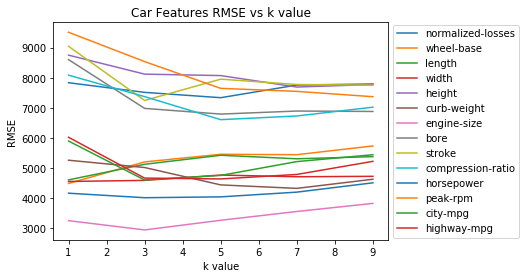

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the results for the kvalues compared to the RMSE 
for k,v in rmse_results.items():
    
    x_values = list(v.keys())
    y_values = list(v.values())
    
    plt.plot(x_values,y_values,label=k) 
    
plt.title('Car Features RMSE vs k value')
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.show()

In [112]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}

for k,v in rmse_results.items():
    
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
    
# convert to a series to format the output nicely
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()


engine-size          3375.274641
horsepower           4191.699237
width                4674.698766
curb-weight          4739.056704
highway-mpg          5071.970954
length               5173.087449
city-mpg             5187.089230
wheel-base           5269.898315
compression-ratio    7166.073599
bore                 7232.319720
normalized-losses    7649.281809
stroke               7955.585214
height               8083.028879
peak-rpm             8124.022815
dtype: float64

In [114]:
# modify knn_train_test to use multiple columns
def knn_train_test_multi(train_cols,target_col,df):
   
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    # get about 50% of the data to use for training the model, split the input dataframe
    half_row = int(shuffled_df.shape[0] * 0.5)
   
    train_df = shuffled_df.iloc[0:half_row]
    test_df = shuffled_df.iloc[half_row:]
    
    model = KNeighborsRegressor()
    model.fit(train_df[train_cols],train_df[target_col])
    predictions = model.predict(test_df[train_cols])
   
    return np.sqrt(mean_squared_error(test_df[target_col],predictions))

rmse_multi_results = dict()

# Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
rmse_multi_results['Using best 2 rmse'] = knn_train_test_multi(['engine-size','horsepower'],'price',numeric_cars)

# Use the best 3 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
rmse_multi_results['Using best 3 rmse'] = knn_train_test_multi(['engine-size','horsepower','curb-weight'],'price',numeric_cars)

# Use the best 4 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
rmse_multi_results['Using best 4 rmse'] = knn_train_test_multi(['engine-size','horsepower','curb-weight','highway-mpg'],'price',numeric_cars)

# Use the best 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value
rmse_multi_results['Using best 5 rmse'] = knn_train_test_multi(['engine-size','horsepower','curb-weight','highway-mpg','length'],'price',numeric_cars)

rmse_multi_results

{'Using best 2 rmse': 2925.00464591321,
 'Using best 3 rmse': 3864.0673819535332,
 'Using best 4 rmse': 3870.6838798617723,
 'Using best 5 rmse': 3872.2947119553833}

In [142]:
# modify knn_train_test to vary hyperparameters between 1 and 25
def knn_train_test_hyper(train_cols,target_col,df):
   
    np.random.seed(1)
    
    hyper_params = [x for x in range(1, 26)]
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    # get about 50% of the data to use for training the model, split the input dataframe
    half_row = int(shuffled_df.shape[0] * 0.5)
   
    train_df = shuffled_df.iloc[0:half_row]
    test_df = shuffled_df.iloc[half_row:]
    
    rmse_k = dict()
    
    for i in hyper_params:
        
        model = KNeighborsRegressor(n_neighbors=i)
        model.fit(train_df[train_cols],train_df[target_col])
        predictions = model.predict(test_df[train_cols])
        rmse_k[i] = np.sqrt(mean_squared_error(test_df[target_col],predictions))
    
    return rmse_k

rmse_k_top = dict()

# For the top 3 models in the last step, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.
rmse_k_top["Top 1"] = knn_train_test_hyper(['engine-size','horsepower'],'price',numeric_cars)
rmse_k_top["Top 2"] = knn_train_test_hyper(['engine-size','horsepower','curb-weight'],'price',numeric_cars)
rmse_k_top["Top 3"] = knn_train_test_hyper(['engine-size','horsepower','curb-weight','highway-mpg'],'price',numeric_cars)

rmse_k_top

{'Top 1': {1: 2832.6762159757077,
  2: 2592.7605347571262,
  3: 2620.3276915723959,
  4: 2824.6258095735284,
  5: 2925.00464591321,
  6: 3162.7465130445685,
  7: 3295.7806528253186,
  8: 3580.3376319325566,
  9: 3844.4403771511702,
  10: 4066.9556417400458,
  11: 4162.8313877399169,
  12: 4250.9953344770765,
  13: 4288.279719198008,
  14: 4318.6775243534248,
  15: 4384.6341844041108,
  16: 4477.3393807249286,
  17: 4542.7101905616355,
  18: 4675.5940589042712,
  19: 4696.9362995014399,
  20: 4684.8444376943871,
  21: 4744.078137218994,
  22: 4779.9698957246619,
  23: 4826.869687492047,
  24: 4881.3490058631751,
  25: 4963.926213279482},
 'Top 2': {1: 4339.5580032264043,
  2: 4237.6860045627882,
  3: 3915.667337998746,
  4: 3856.0240146727137,
  5: 3864.0673819535332,
  6: 4008.3548993882696,
  7: 4077.4287673481854,
  8: 4266.3491801044565,
  9: 4475.6944629090531,
  10: 4414.2209309713689,
  11: 4595.4366200424784,
  12: 4670.7056225419501,
  13: 4836.3366167993518,
  14: 4932.2879714

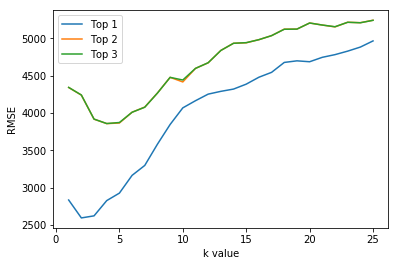

In [143]:
# plot the results
for k,v in rmse_k_top.items():
    
    plt.plot(list(v.keys()),list(v.values()),label=k)   
    plt.legend()
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    
plt.show()